In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR


In [60]:
df = pd.read_csv("data/stud.csv")

In [61]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [62]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [63]:
X = df.drop(columns=['math_score'],axis=1)

In [64]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [65]:
y=df["math_score"]

In [66]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [67]:
numeric_features=X.select_dtypes(exclude='object').columns
categoric_features=X.select_dtypes(include='object').columns


from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


standard_scaler = StandardScaler()
one_hot_encoder = OneHotEncoder()


preprocessor=ColumnTransformer(
    [
    ("OneHotEncoder",one_hot_encoder,categoric_features),
    ("StandarScaler",standard_scaler,numeric_features)
    ]
)

In [68]:
X=preprocessor.fit_transform(X)

In [69]:
X.shape

(1000, 19)

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=1)
X_train.shape,X_test.shape

((800, 19), (200, 19))

In [71]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2=r2_score(true,predicted)
    return mae,mse,rmse,r2


In [72]:
models={
    "Linear Regression": LinearRegression(),
    "KNeighbors Regressor": KNeighborsRegressor(),
    "Decicion Tree Regressor": DecisionTreeRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "CatBoost Regressor": CatBoostRegressor(),
    "XGB Regressor": XGBRegressor(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Random Forest Regressor": RandomForestRegressor(),
    "SVR": SVR()
}

model_list=[]
r2_list=[]

for i in range(len(models)):
    model=list(models.values())[i]
    model.fit(X_train,y_train)


    y_pred=model.predict(X_train)
    y_pred_test=model.predict(X_test)

    evaluate_mse, evaluate_rmse, evaluate_mae, evaluate_r2=evaluate_model(y_train,y_pred)

    evaluate_mse_test, evaluate_rmse_test, evaluate_mae_test, evaluate_r2_test=evaluate_model(y_test,y_pred_test)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])


    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(evaluate_mse))
    print("- Mean Squared Error: {:.4f}".format(evaluate_rmse))
    print("- Mean Absolute Error: {:.4f}".format(evaluate_mae))
    print("- R2 Score: {:.4f}".format(evaluate_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(evaluate_rmse_test))
    print("- Mean Squared Error: {:.4f}".format(evaluate_mse_test))
    print("- Mean Absolute Error: {:.4f}".format(evaluate_mae_test))
    print("- R2 Score: {:.4f}".format(evaluate_r2_test))
    r2_list.append(evaluate_r2_test)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 4.3190
- Mean Squared Error: 29.4054
- Mean Absolute Error: 5.4227
- R2 Score: 0.8695
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 25.5801
- Mean Squared Error: 3.9833
- Mean Absolute Error: 5.0577
- R2 Score: 0.8958


KNeighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4.7020
- Mean Squared Error: 34.9585
- Mean Absolute Error: 5.9126
- R2 Score: 0.8449
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 47.7112
- Mean Squared Error: 5.5260
- Mean Absolute Error: 6.9073
- R2 Score: 0.8056


Decicion Tree Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0088
- Mean Squared Error: 0.0181
- Mean Absolute Error: 0.1346
- R2 Score: 0.9999
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 58.4550
- Mean Squared Error: 6.0050
- 

In [73]:

#Results:
pd.DataFrame(list(zip(model_list,r2_list)),columns=["Model_Name","R2_Score"]).sort_values(by=["R2_Score"],ascending=False)

,Model_Name,R2_Score
0,Linear Regression,0.895776
6,Ridge,0.895447
4,CatBoost Regressor,0.876273
8,Random Forest Regressor,0.856414
3,AdaBoost Regressor,0.841784
5,XGB Regressor,0.836210
7,Lasso,0.829706
1,KNeighbors Regressor,0.805605
9,SVR,0.764951
2,Decicion Tree Regressor,0.761831


In [74]:
# train and tune a linear regression model using randomized search
lin_model = LinearRegression()
param_dist = {
    "fit_intercept": [True, False],
    "positive": [True, False]
}

# use the correct scoring name for R²
random = RandomizedSearchCV(
    estimator=lin_model,
    param_distributions=param_dist,
    scoring='r2',
    random_state=1
)

random.fit(X_train, y_train)

best_model = random.best_estimator_
best_params = random.best_params_

print(best_model)
print(best_params)



LinearRegression(positive=True)
{'positive': True, 'fit_intercept': True}


c:\Users\anjum\Downloads\Projects\mlproject\venv\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [76]:
y_pred = best_model.predict(X_test)
print("R2 Score: ",r2_score(y_test,y_pred))

R2 Score:  0.8954807540309733


Text(0, 0.5, 'Predicted')

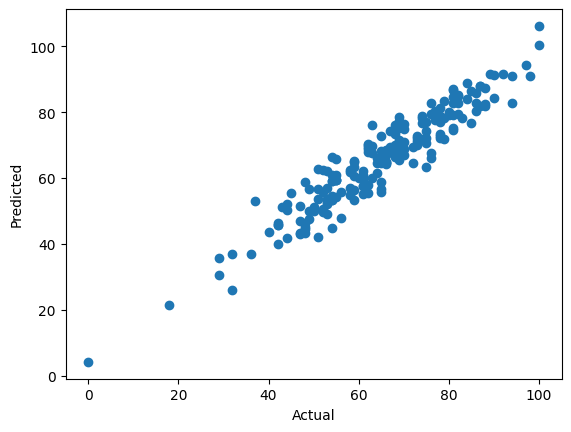

In [77]:
#plot y_test and y_pred
plt.scatter(x=y_test,y=y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [78]:
pred_df=pd.DataFrame({"Actual":y_test,"Predicted":y_pred,"Difference":y_test-y_pred})
pred_df

,Actual,Predicted,Difference
507,55,59.472217,-4.472217
818,60,60.046971,-0.046971
452,65,64.678172,0.321828
368,44,50.288076,-6.288076
242,56,47.891434,8.108566
...,...,...,...
430,64,64.542349,-0.542349
874,43,51.179110,-8.179110
550,79,71.772673,7.227327
608,61,60.946937,0.053063
